In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import copy
import textwrap
global h
h=1

C:\Users\21699\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df20=pd.read_spss('bd20new.sav')
df20t=pd.read_csv("BD2020.csv",on_bad_lines='skip',sep=";")
df20=df20[:-1]
df20['CC']=df20t["CAUSE_SOUS_JACENTE"]
df21 = pd.read_csv("df21t.csv")

<ipython-input-2-c611cad01885>:2: DtypeWarning: Columns (20,23,24,25,26,30,35,36,37,38,39,40,42,43,44,47,48,51,53,77,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df20t=pd.read_csv("BD2020.csv",on_bad_lines='skip',sep=";")
<ipython-input-2-c611cad01885>:5: DtypeWarning: Columns (56,57,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df21 = pd.read_csv("df21t.csv")


In [3]:
df20=df20.set_index('DECES_ID')
df20

,AGENT_DE_SAISIE,AgeAnalyse,GOUVERNORAU,classe_age,UCDcode,CAUSE_SOUS_JACENTE,Alcool,drogue,VAR00001,cancer,...,END_TIME,STATUT_CERTIFICAT,DateOfBirth,DateOfDeath,Age_Days,Age_years,Sous_Chapitre,chapitre,PrimaryLast,CC
DECES_ID,,,,,,,,,,,,,,,,,,,,,
1790402.0,jihed,Pas de prÃ©cision,Bizerte,NaN,Autres gastroentÃ©rites et colites d?origine i...,Autres gastroentÃ©rites et colites d?origine i...,NaN,NaN,5.0,2.0,...,18/11/2020 13:20:21,complet,NaN,NaN,NaN,NaN,Maladies intestinales infectieuses,Certaines maladies infectieuses et parasitaires,Observation principale,A09
4280059.0,marwa,Pas de prÃ©cision,Kasserine,NaN,GastroentÃ©rites et colites d?origine non prÃ©...,GastroentÃ©rites et colites d?origine non prÃ©...,NaN,NaN,5.0,2.0,...,25/11/2020 15:14:00,complet,NaN,NaN,NaN,NaN,Maladies intestinales infectieuses,Certaines maladies infectieuses et parasitaires,Observation principale,A099
1393020.0,jihed,Pas de prÃ©cision,Ben Arous,NaN,"Tuberculose pulmonaire, (sans mention de confi...","Tuberculose pulmonaire, (sans mention de confi...",NaN,NaN,5.0,2.0,...,07/12/2020 10:09:06,complet,NaN,NaN,NaN,NaN,Tuberculose,Certaines maladies infectieuses et parasitaires,Observation principale,A162
1617028.0,Ilhem,Pas de prÃ©cision,Zaghouan,NaN,"Tuberculose pulmonaire, (sans mention de confi...","Tuberculose pulmonaire, (sans mention de confi...",NaN,NaN,5.0,2.0,...,01/04/2021 11:48:02,complet,NaN,NaN,NaN,NaN,NaN,NaN,Observation principale,A162
2140431.0,manel,Pas de prÃ©cision,BÃ©ja,NaN,"Tuberculose pulmonaire, (sans mention de confi...","Tuberculose pulmonaire, (sans mention de confi...",NaN,NaN,5.0,2.0,...,09/02/2021 12:14:31,complet,NaN,NaN,NaN,NaN,Tuberculose,NaN,Observation principale,A162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181632.0,marwa,>=75,Tunis,90-94,"ArrÃªt cardiaque, sans prÃ©cision","ArrÃªt cardiaque, sans prÃ©cision",NaN,NaN,2.0,2.0,...,22/03/2021 10:20:49,complet,1926-01-11,2020-12-31,34688.0,94.0,NaN,NaN,Observation principale,I469
1595025.0,jihed,>=75,Nabeul,90-94,Autres causes de mortalitÃ© mal dÃ©finies et n...,Autres causes de mortalitÃ© mal dÃ©finies et n...,NaN,NaN,4.0,2.0,...,12/02/2021 15:32:08,complet,1926-12-27,2020-12-31,34338.0,94.0,causes de mortalitÃ© mal dÃ©finis et inconnes,NaN,Observation principale,R99
3380207.0,marwa,>=75,Mahdia,95 & plus,ArrÃªt respiratoire,ArrÃªt respiratoire,NaN,NaN,4.0,2.0,...,30/03/2021 16:48:19,complet,1925-07-15,2020-12-31,34868.0,95.0,NaN,NaN,Observation principale,R092


In [43]:
#df21=df21.set_index('DECES_ID')
df21

,AGENT_DE_SAISIE,TYPE_DE_CERTIFICAT,GOUVERNORAU,classe_age,SEXE,CAUSE_SOUS_JACENTE,CAUSE_A,CAUSE_B,CAUSE_C,CAUSE_D,...,STATUT_CERTIFICAT,DateOfBirth,DateOfDeath,Age_years,Age_Days,filter_$,CC,Newage,Nr,CC1
DECES_ID,,,,,,,,,,,,,,,,,,,,,
4110086.0,Amal,Certificat complete,Kairouan,75-79,Masculin,A00,R092,U071,9999,NaN,...,complet,1942-03-13,2021-01-31,78.0,28814.0,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,ME,Certains maladies infectueuses et parasitaires
3210111.0,Amal,Certificat complete,Monastir,<1 an,Feminin,A047,A047,R579,A419,J80,...,complet,2021-08-17,2021-10-07,0.0,51.0,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,ME,Certains maladies infectueuses et parasitaires
1739324.0,Manel,Certificat complete,Bizerte,manquant,Pas de Précision,A047,A419,A047,9999,NaN,...,complet,NaN,NaN,NaN,NaN,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,NE,Certains maladies infectueuses et parasitaires
4340381.0,Ilhem,Certificat complete,Sidi Bouzid,<1 an,Masculin,A049,J960,R579,A419,A049,...,complet,2021-01-20,2021-12-15,0.0,329.0,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,MW,Certains maladies infectueuses et parasitaires
3118068.0,Amal,Certificat complete,Sousse,45-49,Feminin,A049,A419,A049,9999,NaN,...,complet,1974-04-05,2021-12-21,47.0,17427.0,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,ME,Certains maladies infectueuses et parasitaires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710380.0,Amal,Certificat complete,Bizerte,95 & plus,Masculin,Z740,Z740,9999,NaN,NaN,...,complet,1920-02-12,2021-06-19,101.0,37018.0,Not Selected,Causes externes de morbidité et de mortalité,Undefined,NE,Causes externes de morbidité et de mortalité
1710388.0,Amal,Certificat complete,Bizerte,95 & plus,Masculin,Z740,Z740,9999,NaN,NaN,...,complet,1920-10-04,2021-04-28,100.0,36731.0,Not Selected,Causes externes de morbidité et de mortalité,Undefined,NE,Causes externes de morbidité et de mortalité
53060034.0,Amal Louati,Certificat (Bas complet),Tataouine,manquant,Pas de Précision,Z740,9999,9999,NaN,NaN,...,complet,NaN,NaN,NaN,NaN,Not Selected,Causes externes de morbidité et de mortalité,Undefined,SE,Causes externes de morbidité et de mortalité


In [44]:
NewC=[]
NewC1=[]
Listt=[]
Listt1=[]
ListC=[]
ListD=[]
ListD1=[]
ListD2=[]
ListE=[]
ListE1=[]
ListE2=[]
ListG=[]
ListH=[]
ListI=[]
ListJ1=[]
ListJ2=[]
ListK=[]
ListN=[]
ListP=[]
ListP1=[]
ListQ=[]
ListQ1=[]
ListQ2=[]
ListR=[]
ListY=[]
ListV=[]
ListW4=[]
ListW1=[]
ListW2=[]
ListW3=[]
ListX4=[]
ListX1=[]
ListX2=[]
ListX3=[]
ListX5=[]
ListAA=[]
Listt3=[]
Listt5=[]
Liste=[]
Liste1=[]
Liste2=[]
ListF=[]
ListF1=[]
ListF2=[]
Listg=[]
Listg1=[]
ListH1=[]
Listi=[]
Listi1=[]
Listi2=[]
Listi3=[]
Listj=[]
Listj1=[]
Listj2=[]
Listk=[]
Listk1=[]
Listk2=[]
ListL=[]
ListM=[]
Listn=[]
Listn1=[]
Listo=[]
Listo1=[]
Listp=[]
Listq=[]
Listw1=[]
Listw2=[]
#ListA=['A00','D01','D03','D04','D05','D06','D07','D08','D09']
#Listt2=['H00','H01','H03','H04','H05','H06','H07','H08','H09']
for i in range(20,33):
    Listt.append('A'+str(i))
for i in range(21,33):
    Listt1.append('A'+str(i))
for i in range(42,80):
    Listt.append('A'+str(i))
for i in range(35,50):
    Listt.append('B'+str(i))
for i in range(55,95):
    Listt.append('B'+str(i))
for i in range(0,91):
    if i in range(0,10):
        i='0'+str(i)
    ListC.append('C'+str(i))
for i in range(0,49):
    if i in range(0,10):
        i='0'+str(i)
    ListD.append('D'+str(i))
for i in range(50,65):
    ListD1.append('D'+str(i))
for i in range(65,90):
    ListD2.append('D'+str(i))
for i in range(40,65):
    ListE.append('E'+str(i))
for i in range(0,35):
    if i in range(0,10):
        i='0'+str(i)
    ListE1.append('E'+str(i))
for i in range(65,89):
    ListE2.append('E'+str(i))
for i in range(4,99):
    if i in range(0,10):
        i='0'+str(i)
    ListG.append('G'+str(i))
for i in range(60,94):
    ListH.append('H'+str(i))
for i in range(0,100):
    if i in range(0,10):
        i='0'+str(i)
    ListI.append('I'+str(i))
for i in range(0,12):
    if i in range(0,10):
        i='0'+str(i)
    ListJ1.append('J'+str(i))
for i in range(30,99):
    ListJ2.append('J'+str(i))
for i in range(0,93):
    if i in range(0,10):
        i='0'+str(i)
    ListK.append('K'+str(i))
for i in range(0,99):
    if i in range(0,10):
        i='0'+str(i)
    ListK.append('N'+str(i))
for i in range(50,62):
    ListP.append('P'+str(i))
for i in range(70,97):
    ListP1.append('P'+str(i))
for i in range(90,100):
    ListQ.append('Q'+str(i))
for i in range(10,19):
    ListQ1.append('Q'+str(i))
for i in range(30,90):
    ListQ2.append('Q'+str(i))
for i in range(0,100):
    if i in range(0,10):
        i='0'+str(i)
    ListR.append('R'+str(i))
for i in range(1,90):
    ListY.append('Y'+str(i))
for i in range(1,100):
    ListV.append('V'+str(i))
for i in range(65,75):
    ListW1.append('W'+str(i))
for i in range(75,85):
    ListW2.append('W'+str(i))
for i in range(0,10):
    if i in range(0,10):
        i='0'+str(i)
    ListX1.append('X'+str(i))
for i in range(40,50):
    ListX2.append('X'+str(i))
for i in range(85,100):
    ListX3.append('X'+str(i))
for i in range(85,100):
    ListW3.append('W'+str(i))
for i in range(0,65):
    if i in range(0,10):
        i='0'+str(i)
    ListW4.append('W'+str(i))
for i in range(10,50):
    ListX4.append('X'+str(i))
for i in range(50,85):
    ListX5.append('X'+str(i))
for i in range(50,65):
    ListAA.append('A'+str(i))
for i in range(0,15):
    if i in range(0,10):
        i='0'+str(i)
    Listt.append('C'+str(i))
for i in range(0,8):
    if i in range(0,10):
        i='0'+str(i)
    Liste.append('E'+str(i))
for i in range(15,35):
    Liste1.append('E'+str(i))
for i in range(50,66):
    Liste2.append('E'+str(i))
for i in range(10,20):
    ListF.append('F'+str(i))
for i in range(1,10):
    if i in range(0,10):
        i='0'+str(i)
    ListF1.append('F'+str(i))
for i in range(20,100):
    ListF2.append('F'+str(i))
for i in range(4,26):
    if i in range(0,10):
        i='0'+str(i)
    Listg.append('G'+str(i))
for i in range(31,99):
    Listg1.append('G'+str(i))
    
for i in range(0,58):
    if i in range(0,10):
        i='0'+str(i)
    ListH1.append('H'+str(i))
    
for i in range(0,10):
    if i in range(0,10):
        i='0'+str(i)
    Listi.append('I'+str(i))
for i in range(26,57):
    Listi1.append('I'+str(i))
for i in range(60,70):
    Listi2.append('I'+str(i))
for i in range(71,100):
    Listi3.append('I'+str(i))
    
for i in range(0,6):
    if i in range(0,10):
        i='0'+str(i)
    Listj.append('J'+str(i))
    
    
for i in range(30,40):
    Listj1.append('J'+str(i))
for i in range(60,99):
    Listj2.append('J'+str(i))
for i in range(0,23):
    if i in range(0,10):
        i='0'+str(i)
    Listk.append('K'+str(i))
for i in range(28,67):
    Listk1.append('K'+str(i))
for i in range(80,93):
    Listk2.append('K'+str(i))
for i in range(0,99):
    if i in range(0,10):
        i='0'+str(i)
    ListL.append('L'+str(i))
for i in range(0,100):
    if i in range(0,10):
        i='0'+str(i)
    ListM.append('M'+str(i))
for i in range(0,16):
    if i in range(0,10):
        i='0'+str(i)
    Listn.append('N'+str(i))
for i in range(17,99):
    Listn1.append('N'+str(i))
for i in range(0,8):
    if i in range(0,10):
        i='0'+str(i)
    Listo.append('O'+str(i))
for i in range(10,93):
    Listo1.append('O'+str(i))
for i in range(0,97):
    if i in range(0,10):
        i='0'+str(i)
    Listp.append('P'+str(i))
for i in range(0,100):
    if i in range(0,10):
        i='0'+str(i)
    Listq.append('Q'+str(i))
for i in range(0,20):
    if i in range(0,10):
        i='0'+str(i)
    Listw1.append('W'+str(i))
for i in range(65,75):
    Listw2.append('W'+str(i))
#for i in range(10,58):
#    Listt.append('H'+str(i))

In [41]:
df21.iloc[0:2,3]

DECES_ID
4110086.0    75-79
3210111.0    <1 an
Name: classe_age, dtype: object

In [45]:
n=-1
for row in df21.iloc[0:71841,3]:
    n=n+1
    if row=="<1 an":
        for row1 in df21.iloc[n:n+1,5]:
            r=str(row1)[0:3]
            if r=="A09":
                NewC.append("Diarrhée et gastro_entérite d'origine présumée infectieuse")
            elif r=="A17" or r=="A18" or r=="A19" or r=="A15" or r=="A16":
                NewC.append("Tuberculose")
            elif r=="A00" or r=="A00" or r=="A01" or r=="A02" or r=="A03" or r=="A04" or r=="A05" or r=="A06" or r=="A07" or r=="A08":
                NewC.append("Autres maladies intestinales infectieuses")
            elif r=="A33" or r=="A35":
                NewC.append("Tétanos")
            elif r=="A36":
                NewC.append("Diphtérie")
            elif r=="A37":
                NewC.append("Coqueluche")
            elif r=="A39":
                NewC.append("Infection à méningocoques")
            elif r=="A40" or r=="A41":
                NewC.append("Septicémie")
            elif r=="A80":
                NewC.append("Poliomyélite aigué")
            elif r=="B05":
                NewC.append("Rougeole")
            elif r=="B20" or r=="B21" or r=="B22" or r=="B23" or r=="B24":
                NewC.append("VIH")
            elif r=="B04" or r=="B03" or r=="B02" or r=="B01" or r=="B06" or r=="B07" or r=="B08" or r=="B09" or r=="B10" or r=="B11" or r=="B12" or r=="B13" or r=="B14" or r=="B15" or r=="B16" or r=="B17" or r=="B18" or r=="B19" or r=="B25" or r=="B26" or r=="B27" or r=="B28" or r=="B29" or r=="B30" or r=="B31" or r=="B32" or r=="B33" or r=="B34" or r=="A81" or r=="A82" or r=="A83" or r=="A84" or r=="A85" or r=="A86" or r=="A87" or r=="A88" or r=="A89" or r=="A90" or r=="A91" or r=="A92" or r=="A93" or r=="A94" or r=="A95" or r=="A96" or r=="A97" or r=="A98" or r=="A99":
                NewC.append("Autres maladies à virus")
            elif r=="B50" or r=="B51" or r=="B52" or r=="B53" or r=="B54":
                NewC.append("Paludisme")
            elif r in Listt or r=="A38" or r=="B99":
                NewC.append("Reste du chapitre de certaines maladieinfectieuses et parasitaires")
            elif r=="C91" or r=="C92" or r=="C93" or r=="C94" or r=="C95":
                NewC.append("Leucémies")
            elif r in ListC or r=="C96" or r=="C97":
                NewC.append("Restant des tumeurs malignes")
            elif r in ListD :
                NewC.append("Reste du chapitre des tumeurs")
            elif r in ListD1:
                NewC.append("Anémies")
            elif r in ListD2:
                NewC.append("Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire")
            elif r in ListE:
                NewC.append("Malnutrition et autre carences nutritionnelles")
            elif r in ListE1 or r in ListE2:
                NewC.append("Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques")
            elif r=="G00" or r=="G03":
                NewC.append("Méningites")
            elif r in ListG :
                NewC.append("Reste du chapitre des maladies du système nerveux")
            elif r in ListH :
                NewC.append("Maladies de l'oreille et de l'apophysemastoide")
            elif r in ListI :
                NewC.append("Maladies de l'appareil circulatoire")
            elif r=="J12" or r=="J13" or r=="J14" or r=="J15" or r=="J16" or r=="J17" or r=="J18":
                NewC.append("Pneumopathies")
            elif r=="J20" or r=="J21" or r=="J22" or r in ListJ1 :
                NewC.append("Autres affections aigues des voies respiratoires")
            elif r in ListJ2 :
                NewC.append("Reste du chapitre des maladies de l'appareil respiratoire")
            elif r in ListK :
                NewC.append("Maladies de l'appareil digestif")
            elif r in ListN :
                NewC.append("Maladies de l'appareil génito-urinaire")
            elif r=="P00" or r=="P01" or r=="P02" or r=="P03"or r=="P04":
                NewC.append("Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement")
            elif r=="P05" or r=="P06" or r=="P06" or r=="P07" or r=="P08":
                NewC.append("Anomalies liées à la durée de la gestation et à la croissance du foetus")
            elif r=="P10" or r=="P11" or r=="P12" or r=="P13" or r=="P14" or r=="P15":
                NewC.append("Traumatismes obstétricaux")
            elif r=="P20" or r=="P21":
                NewC.append("PHypoxie intra uterine et asphyxie obstericale")   
            elif r=="P22":
                NewC.append("Détresse respiratoire du nouveau né")
            elif r=="P23":
                NewC.append("Pneumpathie cogénitale")    
            elif r=="P24" or r=="P25" or r=="P26" or r=="P27" or r=="P28":
                NewC.append("Autres troubles respiratoires du nouveau-né")    
            elif r=="P36":
                NewC.append("Infection bactérienne du nouveau-né")
            elif r=="P38":
                NewC.append("Omphalite du nouveau-né avec ou sans hémorragie légère")    
            elif r in ListP:
                NewC.append("Affections hémorragiques et hématologiques du foetus et du nouveau_né")    
            elif r=="P29" or r=="P35" or r=="P37" or r=="P39" or r in ListP1:
                NewC.append("Reste du chapitre des affections dont l'origine se situe dans la période périnatale")
            elif r=="Q03" or r=="Q05":
                NewC.append("Hydrocéphalie congénitale et spina bifida")
            elif r=="Q00" or r=="Q02" or r=="Q01" or r=="Q04" or r=="Q06" or r=="Q07":
                NewC.append("Autres malformations congénitales du système nerveux")
            elif r=="Q20" or r=="Q21" or r=="Q22" or r=="Q23" or r=="Q24":
                NewC.append("Malfromations congénitales du coeur")
            elif r=="Q25" or r=="Q26" or r=="Q27" or r=="Q28":
                NewC.append("Autres malformations congénitales de l'appareil circulatoire")
            elif r in ListQ:
                NewC.append("Syndrome de Down et autres anomalies chromosomiques")
            elif r in ListQ1 or r in ListQ2:
                NewC.append("Autres malformations congénitales")
            elif r in ListR:
                NewC.append("Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs")
            elif r in ListY:
                NewC.append("Cause externes de morbidité et de mortalité")
            elif r in ListV:
                NewC.append("Accident de transport")
            elif r in ListW1:
                NewC.append("Noyade et submersion accidentelles")
            elif r in ListW2:
                NewC.append("Autre accodents affectant la respiration")
            elif r in ListX1:
                NewC.append("Exposition a la fumée, au feu et aux flammes")
            elif r in ListX2:
                NewC.append("Intoxication accidentelle")
            elif r in ListX3:
                NewC.append("Agressions")
            elif r in ListW3 or r in ListW4 or r in ListX4 or r in ListX5 :
                NewC.append("Toutes autres causes externes")
            elif r=="U04":
                NewC.append("SRAS")
            elif r=="U07":
                NewC.append("COVID-19")   
            else:
                NewC.append("Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs")
                
                
                
                
                
                
                
                
                
                
    else:
        for row1 in df21.iloc[n:n+1,5]:
            r=str(row1)[0:3]
            if r=="A09":
                NewC.append("Diarrhée et gastro_entérite d'origine présumée infectieuse")
            elif r=="A00":
                NewC.append("Choléra")
            elif r=="A15" or r=="A16":
                NewC.append("Tuberculose de l'appareil respiratoire")
            elif r=="A17" or r=="A18" or r=="A18":
                NewC.append("Autre formes de tuberculose")
            elif r=="A00" or r=="A00" or r=="A01" or r=="A02" or r=="A03" or r=="A04" or r=="A05" or r=="A06" or r=="A07" or r=="A08":
                NewC.append("Autres maladies intestinales infectieuses")
            elif r=="A20":
                NewC.append("Peste")
            elif r=="A33" or r=="A35":
                NewC.append("Tétanos")
            elif r=="A36":
                NewC.append("Diphtérie")
            elif r=="A37":
                NewC.append("Coqueluche")
            elif r=="A39":
                NewC.append("Infection à méningocoques")
            elif r=="A40" or r=="A41":
                NewC.append("Septicémie")
            elif r in ListAA:
                NewC.append("Infection dont le mode de transmission est essentiellement sexuel")
            elif r=="A80":
                NewC.append("Poliomyélite aigué")
            elif r=="A82":
                NewC.append("Rage")
            elif r=="A95":
                NewC.append("Fièvre jaune")
            elif r=="A92" or r=="A93" or r=="A94" or r=="A96" or r=="A97" or r=="A98" or r=="A99":
                NewC.append("Fièvre virales trasmises par des arthropodes")
            elif r=="B05":
                NewC.append("Rougeole")
            elif r=="B15" or r=="B16" or r=="B17" or r=="B18" or r=="B19":
                NewC.append("Hépatite virale")
            elif r=="B20" or r=="B21" or r=="B22" or r=="B23" or r=="B24":
                NewC.append("VIH")
            elif r=="B50" or r=="B51" or r=="B52" or r=="B53" or r=="B54":
                NewC.append("Paludisme")
            elif r=="B55":
                NewC.append("Leishmaniose")
            elif r=="B56" or r=="B57":
                NewC.append("Trypanosomiase")
            elif r=="B65":
                NewC.append("Schistosomiase")
            elif r in Listt1 or r=="A38" or r=="B99":
                NewC.append("Reste du chapitre de certaines maladieinfectieuses et parasitaires")
            elif r in Listt3:
                NewC.append("Tumeurs maligne de la lèvre de la cavité buccale et pharynx")
            elif r=="C15":
                NewC.append("Tumeurs maligne de l'oesophage")
            elif r=="C16":
                NewC.append("Tumeurs maligne de l'estomac")
            elif r=="C18" or r=="C19" or r=="C20" or r=="C21":
                NewC.append("Tumeurs maligne du colon, du rectum et de l'anus")
            elif r=="C22":
                NewC.append("Tumeurs maligne de foie et des voies biliaires intra héctiques")
            elif r=="C25":
                NewC.append("Tumeurs maligne du pancréas")
            elif r=="C32":
                NewC.append("Tumeurs maligne du larynx")
            elif r=="C33" or r=="C34":
                NewC.append("Tumeurs maligne de la trachée, des bronches et du poumon")
            elif r=="C43":
                NewC.append("Mélanome  malin de la peau")
            elif r=="C50":
                NewC.append("Tumeurs maligne du sein")
            elif r=="C53":
                NewC.append("Tumeurs maligne du l'utérus")
            elif r=="C54" or r=="C55":
                NewC.append("Tumeurs maligne de partie du l'utérus, autres et non precisées")
            elif r=="C56":
                NewC.append("Tumeurs maligne de l'ovaire")
            elif r=="C61":
                NewC.append("Tumeurs maligne de la prostate")
            elif r=="C67":
                NewC.append("Tumeurs maligne de al vessie")
            elif r=="C70" or r=="C71" or r=="C72":
                NewC.append("Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central")
            elif r=="C83" or r=="C84" or r=="C85":
                NewC.append("Lymphome non hodkinien")
            elif r=="C90":
                NewC.append("Myélome multiple et tumeurs malignes à plasmocytes")
            elif r=="C91" or r=="C92" or r=="C93" or r=="C94" or r=="C95":
                NewC.append("Leucémies")
            elif r=="C17" or r=="C23" or r=="C24" or r=="C26" or r=="C27" or r=="C28" or r=="C29" or r=="C30" or r=="C31" or r=="C37" or r=="C38" or r=="C39" or r=="C40" or r=="C41" or r=="C44" or r=="C45" or r=="C46" or r=="C47" or r=="C48" or r=="C49" or r=="C51" or r=="C52" or r=="C57" or r=="C58" or r=="C59" or r=="C60" or r=="C62" or r=="C63" or r=="C64" or r=="C65" or r=="C66" or r=="C68" or r=="C69" or r=="C73" or r=="C74" or r=="C75" or r=="C76" or r=="C77" or r=="C78" or r=="C79" or r=="C80" or r=="C81" or r=="C88" or r=="C96" or r=="C97":
                NewC.append("Restant des tumeurs malignes")
            elif r in ListD :
                NewC.append("Reste du chapitre des tumeurs")
            elif r in ListD1:
                NewC.append("Anémies")
            elif r in ListD2:
                NewC.append("Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire")
            elif r in ListE or r=="40" or r=="41" or r=="42" or r=="43" or r=="44" or r=="45" or r=="46" or r=="47" or r=="48" or r=="49":
                NewC.append("Malnutrition")
            elif r=="E10" or r=="E11" or r=="E12" or r=="E13" or r=="E14":
                NewC.append("Diabète sucré")
            elif r in ListE2 or r in Liste or r in Liste1 or r in Liste2:
                NewC.append("Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques")
            elif r in ListF :
                NewC.append("Trouble mentaux liés a l'utilisation de substances psychoactives")
            elif r in ListF1 or r in ListF2:
                NewC.append("Reste du chapitre des troubles mentaux et du comportement")
            elif r=="G00" or r=="G03":
                NewC.append("Méningites")
            elif r=="G30":
                NewC.append("Alzheimer")
            elif r in Listg or r in Listg1 :
                NewC.append("Reste du chapitre des maladies du système nerveux")
            elif r in ListH :
                NewC.append("Maladies de l'oreille et de l'apophysemastoide")
            elif r in ListH1 :
                NewC.append("Maladies de l'oreille et de ses annexes")
            elif r in Listi :
                NewC.append("Rhumatisme")
            elif r=="I10" or r=="I11" or r=="I12" or r=="13" :
                NewC.append("Maladies hypertensives")
            elif r=="I20" or r=="I21" or r=="I22" or r=="23" or r=="I24" or r=="25":
                NewC.append("Cardiopathies ischémiques")
            elif r in Listi1:
                NewC.append("Autres cardiopathies")
            elif r in Listi2:
                NewC.append("Maladies cérébrovasculaires")
            elif r=="70":
                NewC.append("Athéroslerose")
            elif r in Listi3:
                NewC.append("Reste du chapitre des maladies de l'appareil circulatoire")
            elif r=="J12" or r=="J13" or r=="J14" or r=="J15" or r=="J16" or r=="J17" or r=="J18":
                NewC.append("Pneumopathies")
            elif r=="J09" or r=="J10" or r=="J11":
                NewC.append("Grippe")
            elif r=="J20" or r=="J21" or r=="J22":
                NewC.append("Autres affections aigués des voies respiratoires inférieurs")
            elif r=="J40" or r=="J41" or r=="J42" or r=="J43" or r=="J44" or r=="J45" or r=="J46" or r=="J47":
                NewC.append("Maladies chroniques des voies respiratoires inférieures")
            elif r in Listj or r in Listj1 or r in Listj2 :
                NewC.append("Reste du chapitre des maladies de l'appareil respiratoire")
            elif r=="K25" or r=="K26" or r=="K27" :
                NewC.append("Ulcère de l'estomac et du duodénum")
            elif r=="K70" or r=="K71" or r=="K72" or r=="K73" or r=="K74" or r=="K75" or r=="K76" or r=="K77":
                NewC.append("Maladies du foie")
            elif r in Listk or r in Listk1 or r in Listk2 :
                NewC.append("Reste du chapitre des maladies de l'appareil digestif")
            elif r in ListL :
                NewC.append("Maladies de la peau et du tissu cellulaire sous-cutané")
            elif r in ListM :
                NewC.append("Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif")
            elif r in Listn :
                NewC.append("Glomérulopathies et maladies rénales tubulo-interstitielles")
            elif r in Listn1 :
                NewC.append("Reste du chapitre des maladies de l'appareil génito-urinaire")
            elif r in Listo :
                NewC.append("Grossesse se terminant par un avortement")
            elif r in Listo1 :
                NewC.append("Autres décès maternels directs")
            elif r=="O98" or r=="O99" :
                NewC.append("Décès maternels indirects")
            elif r in Listp:
                NewC.append("Certaines affections dont l'origine se situe dans la période périnatale")
            elif r in Listq:
                NewC.append("Malformations congénitales et anomalies chromosomiques")
            elif r in ListR:
                NewC.append("Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs")
            elif r in ListV:
                NewC.append("Accident de transport")
            elif r in Listw1:
                NewC.append("Chute")
            elif r in Listw2:
                NewC.append("Noyade et submersion accidentelles")
            elif r in ListX1:
                NewC.append("Exposition a la fumée, au feu et aux flammes")
            elif r in ListX2:
                NewC.append("Intoxication accidentelle")
            elif r in ListX3:
                NewC.append("Agressions")
            elif r in ListW3 or r in ListW4 or r in ListX4 or r in ListX5 :
                NewC.append("Toutes autres causes externes")
            elif r=="U04":
                NewC.append("SRAS")
            elif r=="U07":
                NewC.append("COVID-19")   
            else:
                NewC.append("Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs")

In [46]:
df21['CC1']=NewC
df21.to_csv(r'C:\Users\21699\Desktop\New folder (4)\df21t88.csv')
df21.CC1

DECES_ID
4110086.0                                               Choléra
3210111.0             Autres maladies intestinales infectieuses
1739324.0             Autres maladies intestinales infectieuses
4340381.0             Autres maladies intestinales infectieuses
3118068.0             Autres maladies intestinales infectieuses
                                    ...                        
1710380.0     Symptomes, signes et résultats anormaux d'exam...
1710388.0     Symptomes, signes et résultats anormaux d'exam...
53060034.0    Symptomes, signes et résultats anormaux d'exam...
63070042.0    Symptomes, signes et résultats anormaux d'exam...
11070058.0    Symptomes, signes et résultats anormaux d'exam...
Name: CC1, Length: 71841, dtype: object

In [2]:
df20 = pd.read_csv("df20t88.csv")
df21 = pd.read_csv("df21t88.csv")

<ipython-input-2-8c88775b1745>:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df20 = pd.read_csv("df20t88.csv")
<ipython-input-2-8c88775b1745>:2: DtypeWarning: Columns (56,57,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df21 = pd.read_csv("df21t88.csv")


In [4]:
#df20.replace('Pas de PrÃ©cision','Pas de Précision',inplace=True)
#df20.head()
df20.SEXE

0        Pas de Précision
1        Pas de Précision
2        Pas de Précision
3        Pas de Précision
4        Pas de Précision
               ...       
46414             Feminin
46415             Feminin
46416            Masculin
46417            Masculin
46418            Masculin
Name: SEXE, Length: 46419, dtype: object

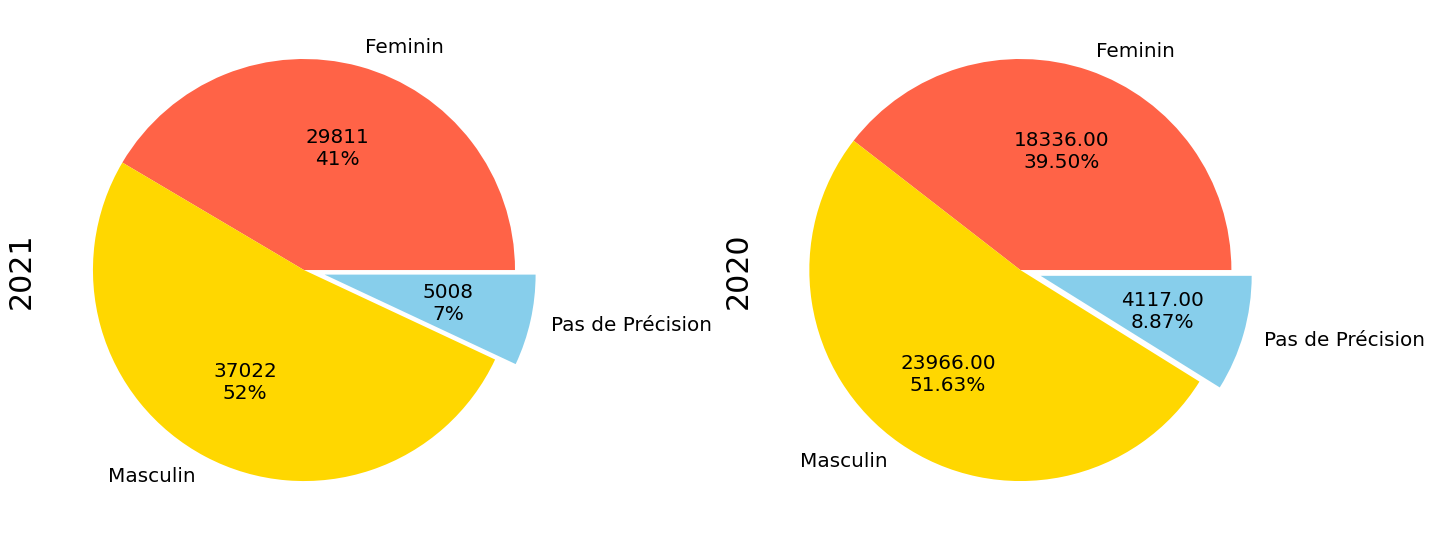

In [15]:
def label_function21(val):
    return f'{val / 100 * len(df21):.00f}\n{val:.00f}%'
def label_function20(val):
    return f'{val / 100 * len(df20):.2f}\n{val:.2f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
explode = (0, 0, 0.1)
df21.groupby('SEXE').size().plot(kind='pie',explode=explode,autopct=label_function21, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)
df20.groupby('SEXE').size().plot(kind='pie',explode=explode,autopct=label_function20, textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue'], ax=ax2)
ax1.set_ylabel('2021', size=30)
ax2.set_ylabel('2020', size=30)
plt.tight_layout()
plt.show()

In [28]:
s=df20['classe_age'].value_counts()
s1=df21['classe_age'].value_counts()
df = pd.DataFrame(df20['classe_age'].value_counts())
d=['80-84','85-89','75-79','70-74','65-69','60-64','90-94','55-59','<1 an','95 & plus','50-54','45-49','40-44','35-39',
'30-34','25-29','1-4','20-24','15-19','5-9','10-14']

In [29]:
s1 = s1.drop(labels = ['manquant']) 


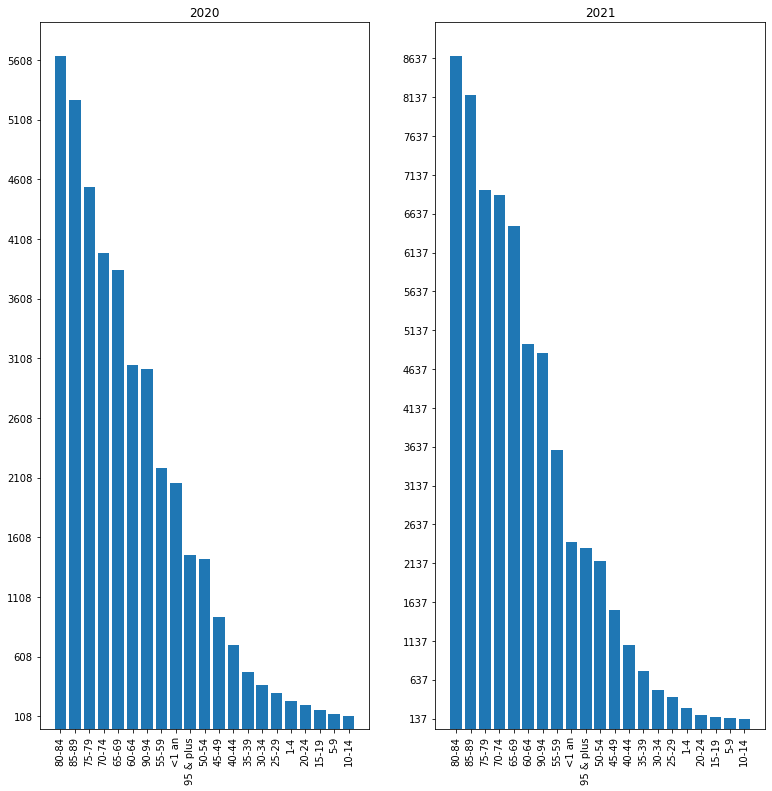

Pour 2021 manquant=9220
Pour 2020 manquant=4033


In [30]:
fig = plt.figure()
fig.set_figheight(13)
fig.set_figwidth(13)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(d, s, align='center')
ax2.bar(d, s1, align='center')
ax1.set_title('2020')
ax1.set_xticklabels(labels=d,rotation=90)
ax2.set_title('2021')
ax2.set_xticklabels(labels=d,rotation=90)
ax1.set_yticks(np.arange(s.min(),s.max(),500))
ax2.set_yticks(np.arange(s1.min(),s1.max(),500))
plt.show()
print("Pour 2021 manquant=9220")
print("Pour 2020 manquant=4033")

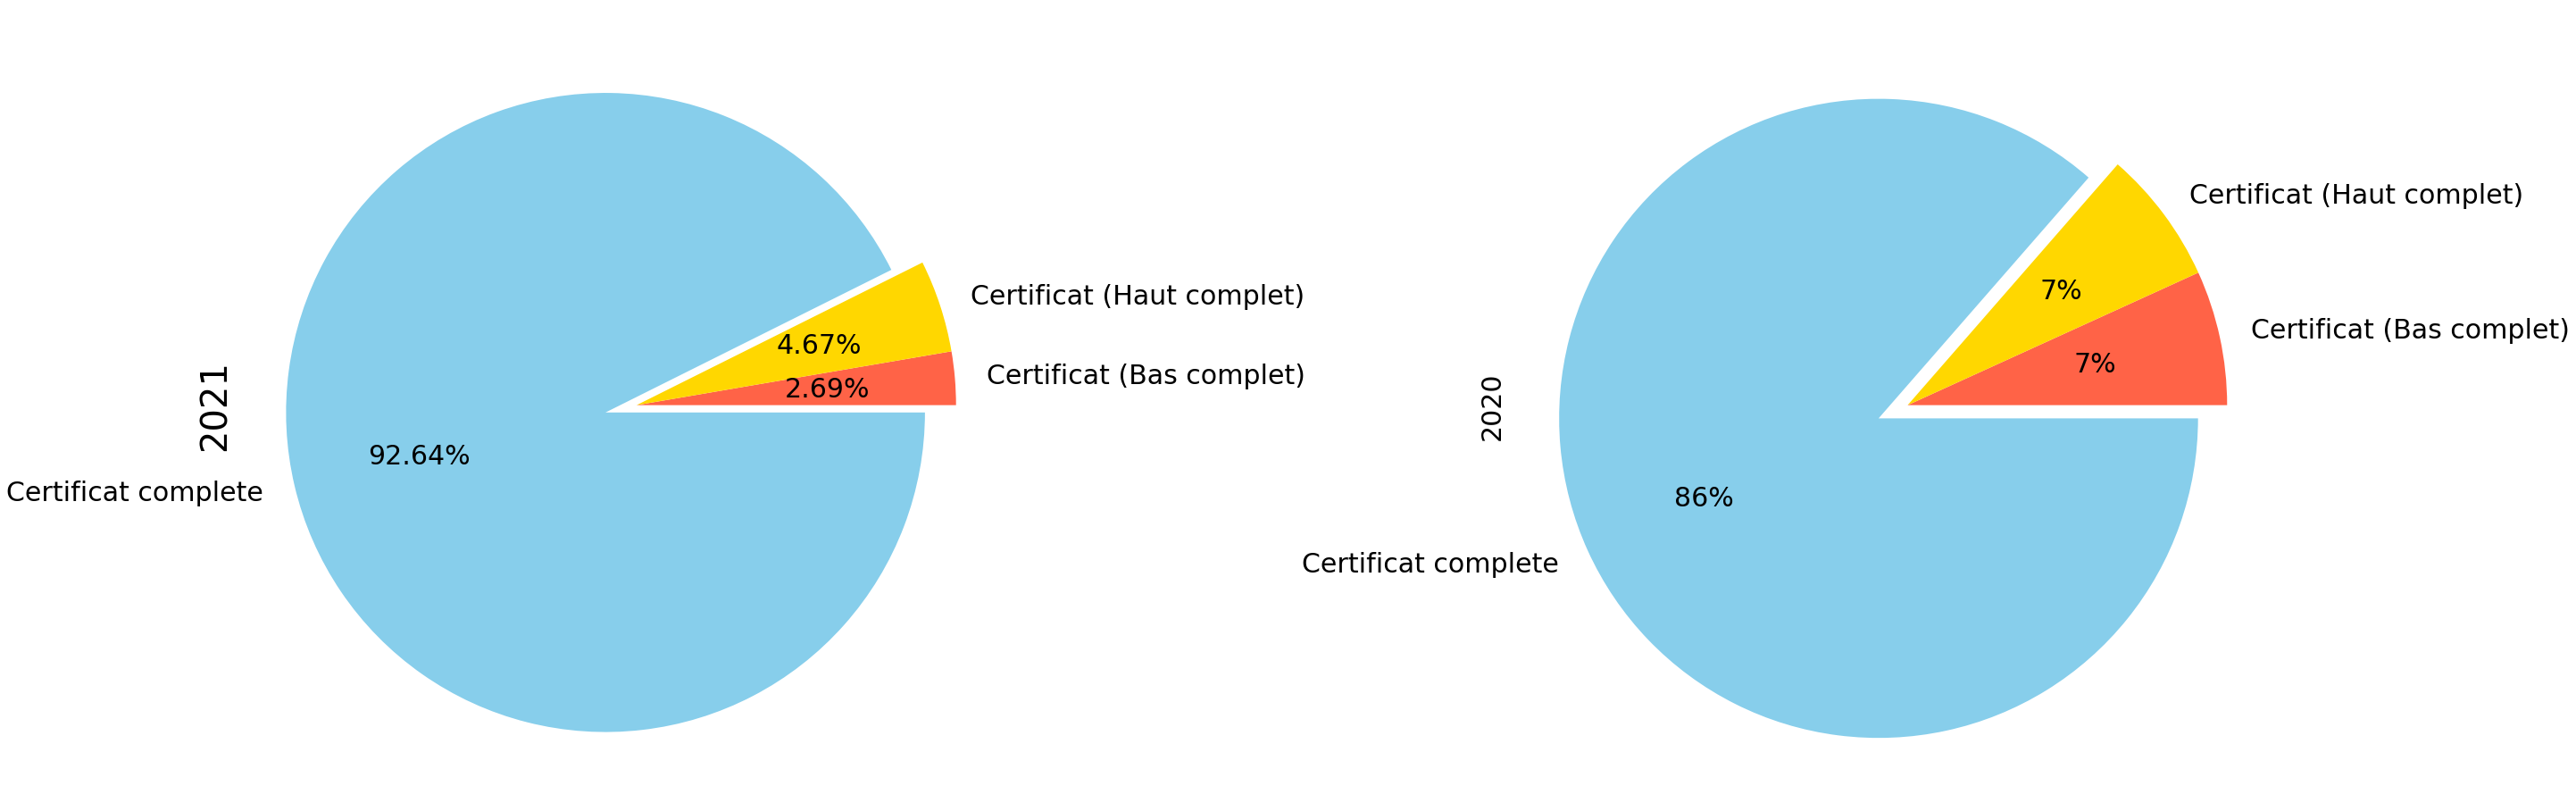

In [31]:
def label_function21(val):
    return f'{val:.2f}%'
def label_function20(val):
    return f'{val:.0f}%'
#{val / 100 * len(df20):.0f}\n
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(40, 40))
explode = (0, 0, 0.1)
df21.groupby('TYPE_DE_CERTIFICAT').size().plot(kind='pie',explode=explode,autopct=label_function21, textprops={'fontsize': 30},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)
df20.groupby('TYPE_DE_CERTIFICAT').size().plot(kind='pie',explode=explode,autopct=label_function20, textprops={'fontsize': 30},
                                 colors=['tomato', 'gold', 'skyblue'], ax=ax2)
ax1.set_ylabel('2021', size=40)
ax2.set_ylabel('2020', size=30)
plt.tight_layout()
plt.show()

In [38]:
l=['Sfax', 'Sousse', 'Nabeul', 'Mednine', 'Ben Arous',
                  'Bizerte', 'Kairouan', 'Ariana', 'Mahdia', 'Jendouba',
                  'Gafsa', 'Gabes', 'Monastir', 'Manouba', 'Kasserine', 'Béja',
                  'Le Kef', 'Siliana', 'Zaghouan', 'Tataouine', 'Sidi Bouzid',
                  'Tozeur', 'Kebili']
k=df20['GOUVERNORAU'].value_counts()
k1=df21['GOUVERNORAU'].value_counts()


In [39]:
k1 = k1.drop(labels = ['Tunis']) 
k = k.drop(labels = ['Tunis']) 

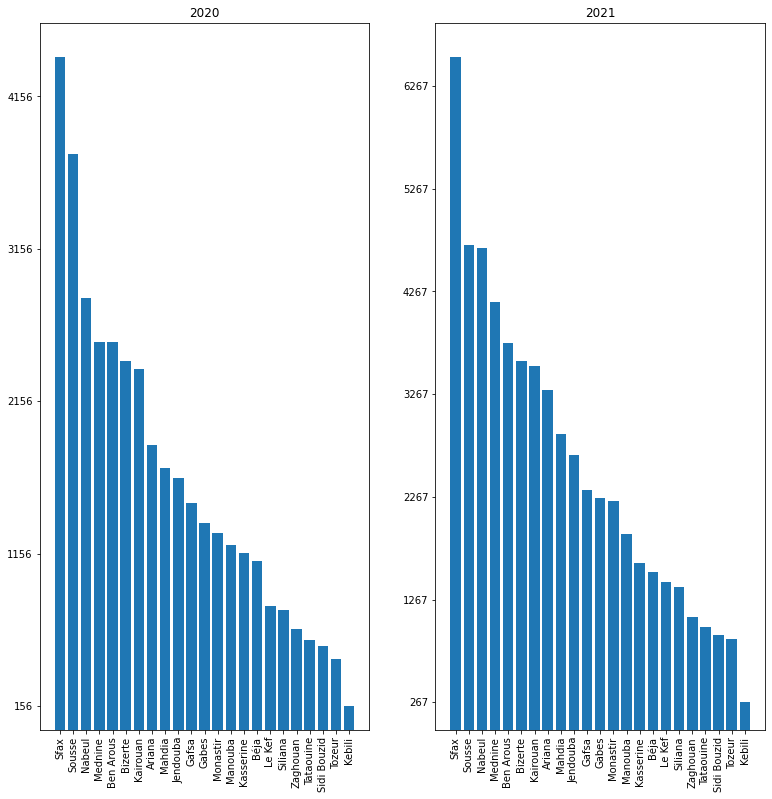

Pour tunis 2020 = 8664
Pour tunis 2021 = 13089


In [41]:
fig = plt.figure()
fig.set_figheight(13)
fig.set_figwidth(13)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(l, k, align='center')
ax2.bar(l, k1, align='center')
ax1.set_title('2020')
ax1.set_xticklabels(labels=l,rotation=90)
ax2.set_title('2021')
ax2.set_xticklabels(labels=l,rotation=90,)
ax1.set_yticks(np.arange(k.min(),k.max(),1000))
ax2.set_yticks(np.arange(k1.min(),k1.max(),1000))
plt.show()
print('Pour tunis 2020 = 8664')
print('Pour tunis 2021 = 13089')